In [1]:
# Importing the libraries for use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Cleaning QVI_Sales_data.xlsx**

In [2]:
# Loading the transaction data Excel file into a dataframe

txn_data = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
# Looking at the shape of the data to be worked with
txn_data.shape

(264836, 8)

In [4]:
# Getting a glimpse of the datafram
txn_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
# Checking the data types for all columns ensuring they are properly formatted
txn_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

The `DATE` column is wrongly formatted, hence should be converted to a datetime object

In [6]:
# Making a copy of the dataframe for cleaning
clean_txn_data = txn_data.copy()

In [7]:
# Parsing the Excel date values to date string
clean_txn_data['DATE'] = pd.to_datetime(clean_txn_data['DATE'], origin='1899-12-30', unit='D')

In [8]:
clean_txn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [9]:
clean_txn_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [10]:
# Setting all columns to lowercase letter variables
clean_txn_data.columns = clean_txn_data.columns.str.lower()

In [11]:
clean_txn_data.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
# Checking for duplicates in the dataframe
clean_txn_data.duplicated().sum()

1

In [13]:
clean_txn_data['date'].sort_values().unique()

<DatetimeArray>
['2018-07-01 00:00:00', '2018-07-02 00:00:00', '2018-07-03 00:00:00',
 '2018-07-04 00:00:00', '2018-07-05 00:00:00', '2018-07-06 00:00:00',
 '2018-07-07 00:00:00', '2018-07-08 00:00:00', '2018-07-09 00:00:00',
 '2018-07-10 00:00:00',
 ...
 '2019-06-21 00:00:00', '2019-06-22 00:00:00', '2019-06-23 00:00:00',
 '2019-06-24 00:00:00', '2019-06-25 00:00:00', '2019-06-26 00:00:00',
 '2019-06-27 00:00:00', '2019-06-28 00:00:00', '2019-06-29 00:00:00',
 '2019-06-30 00:00:00']
Length: 364, dtype: datetime64[ns]

In [50]:
clean_txn_data.groupby('date')['tot_sales'].sum().reset_index().dtypes

date         datetime64[ns]
tot_sales           float64
dtype: object

In [48]:
pd.DataFrame(pd.date_range('2018-07-01','2019-06-30')).dtypes

0    datetime64[ns]
dtype: object

In [61]:
daily_txn = (
    pd.DataFrame(pd.date_range('2018-07-01','2019-06-30'),columns=['date'])
    .merge(right=clean_txn_data.groupby('date')['tot_sales']
           .sum()
           .reset_index(),how='left'
           )
    .set_index('date')
)

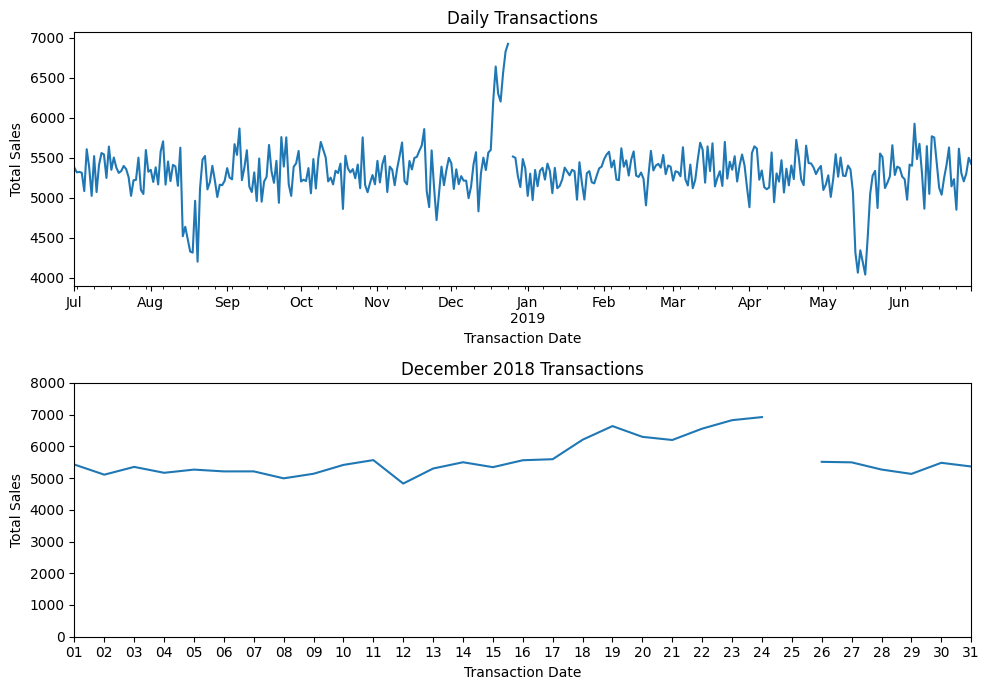

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
daily_txn.plot(ax=axes[0])
axes[0].set_title('Daily Transactions')
axes[0].legend().remove()
axes[0].set_xlabel('Transaction Date')
axes[0].set_ylabel('Total Sales')

daily_txn.loc['2018-12'].plot(ax=axes[1], ylim=(0,8000))
axes[1].set_title('December 2018 Transactions')
dec_dates = pd.date_range(start='2018-12-01', end='2018-12-31', freq='D')
axes[1].set_xticks(dec_dates)
axes[1].set_xticklabels(dec_dates.strftime('%d'))
axes[1].set_xlabel('Transaction Date')
axes[1].set_ylabel('Total Sales')
axes[1].legend().remove()

plt.tight_layout()
plt.savefig('daily-transactions.png')

In [ ]:
for x in pd.date_range('2018-07-01','2019-06-30'):
    if x not in (clean_txn_data['date'].sort_values().unique()):
        print(x)

2018-12-25 00:00:00


The dataset contains the chips' purchase transcations for one year, however the only date missing from the dataset is Christmas Day. I assume shops were closed for the celebration, further investigation should be carried out to ensure the validity of the hypothesis.

In [ ]:
# Filtering out duplicate records from the dataframe
clean_txn_data = clean_txn_data[~clean_txn_data.duplicated()]

In [ ]:
# Extracting the pack size for each product
clean_txn_data['pack_size'] = clean_txn_data['prod_name'].str[-4:]

In [ ]:
clean_txn_data.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [ ]:
# Getting an overview of values in the pack_size column

clean_txn_data['pack_size'].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '210G', '270g',
       '220g', '125g', '110g', '134g', '150G', '175G', '380g', '180g',
       '165g', 'Salt', '250g', '200g', '160g', '190g', ' 90g', ' 70g'],
      dtype=object)

In [ ]:
# Cleaning the values in pack size column to solely lower case
clean_txn_data['pack_size'] = clean_txn_data['pack_size'].str.lower()

# Cleaning the pack size column
clean_txn_data.loc[clean_txn_data['pack_size'] == 'salt', 'pack_size'] = '135g'

# Converting pack size to integer values
clean_txn_data['pack_size'] = clean_txn_data['pack_size'].str[-4:-1].astype(int)

In [ ]:
clean_txn_data['pack_size'].unique()

array([175, 170, 150, 300, 330, 210, 270, 220, 125, 110, 134, 380, 180,
       165, 135, 250, 200, 160, 190,  90,  70])

In [ ]:
# Creating a brand_name column for further analysis
clean_txn_data['brand_name'] = clean_txn_data['prod_name'].str.split(' ').str[0]

In [ ]:
clean_txn_data['brand_name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

There are some repititions in the form of abbreviations here, hence they need to be corrected before proceeding with the analysis

In [ ]:
# Cleaning brand name repititions in the form of abbreviations
clean_txn_data.loc[clean_txn_data['brand_name'] == 'Infzns', 'brand_name'] = 'Infuzions'
clean_txn_data.loc[clean_txn_data['brand_name'] == 'Smith', 'brand_name'] = 'Smiths'
clean_txn_data.loc[clean_txn_data['brand_name'] == 'GrnWves', 'brand_name'] = 'Grain'
clean_txn_data.loc[clean_txn_data['brand_name'] == 'Dorito', 'brand_name'] = 'Doritos'
clean_txn_data.loc[clean_txn_data['brand_name'] == 'Snbts', 'brand_name'] = 'Sunbites'
clean_txn_data.loc[clean_txn_data['brand_name'] == 'WW', 'brand_name'] = 'Woolworths'
clean_txn_data.loc[clean_txn_data['brand_name'] == 'Red', 'brand_name'] = 'RRD'
clean_txn_data.loc[clean_txn_data['brand_name'] == 'Natural', 'brand_name'] = 'NCC'

In [ ]:
clean_txn_data['brand_name'].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [ ]:
clean_txn_data.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [ ]:
clean_txn_data.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales,pack_size
count,264835,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000,264835.000000
mean,2018-12-30 00:52:42.252722944,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205,182.427032
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000
std,NaN,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231,64.327316


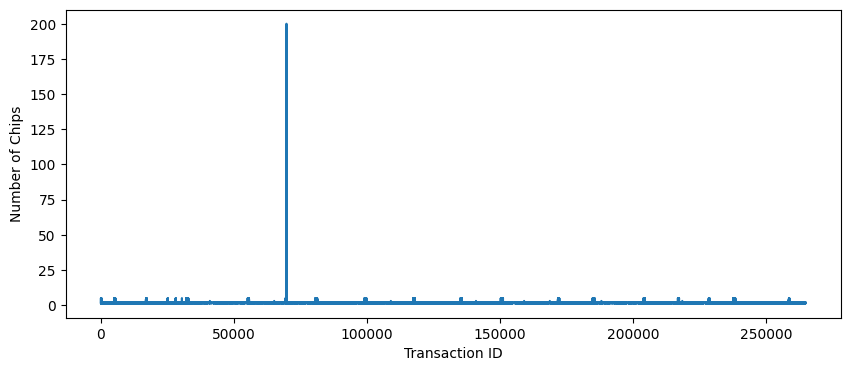

In [ ]:
# Checking for outliers in the prod_qty column
plt.figure(figsize=(10,4))
plt.plot(clean_txn_data['prod_qty'])
plt.xlabel('Transaction ID')
plt.ylabel('Number of Chips')
plt.show()

In [ ]:
# Removing the outlier from the data
clean_txn_data = clean_txn_data.loc[clean_txn_data['prod_qty'] != 200]

# Removing rows containing blanks
clean_txn_data = clean_txn_data.dropna(axis=0)

In [ ]:
products = pd.DataFrame(clean_txn_data['prod_name'].unique())

In [ ]:
# Checking for non-chips products
products.loc[~products[0].str.lower().str.contains(pat='chip',case=False)]

,0
1,CCs Nacho Cheese 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g
5,Old El Paso Salsa Dip Tomato Mild 300g
7,Grain Waves Sweet Chilli 210g
9,Grain Waves Sour Cream&Chives 210G
...,...
109,Red Rock Deli Chikn&Garlic Aioli 150g
110,RRD SR Slow Rst Pork Belly 150g
111,RRD Pc Sea Salt 165g
112,Smith Crinkle Cut Bolognese 150g


In [ ]:
clean_txn_data = clean_txn_data.loc[~clean_txn_data['prod_name'].str.lower().str.contains(pat='salsa', case=False)]

In [ ]:
clean_txn_data.shape

(246739, 10)

In [ ]:
clean_txn_data.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales,pack_size
count,246739,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000,246739.000000
mean,2018-12-30 01:19:29.982856448,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,7.316118,175.583523
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,2.474901,59.432239


In [ ]:
clean_txn_data['unit_price'] = clean_txn_data['tot_sales']/clean_txn_data['prod_qty']

## **Cleaning QVI_purchase_behaviour.csv**

In [ ]:
# Loading the dataset into a dataframe
customer_infox = pd.read_csv('QVI_purchase_behaviour.csv')

In [ ]:
customer_info = customer_infox.copy()

In [ ]:
customer_info.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# Setting all columns to lowercase
customer_info.columns = customer_info.columns.str.lower()

In [ ]:
# Checking for duplicates in the Purchase Behaviour datafram
customer_info.duplicated().sum()

0

In [ ]:
customer_info.head()

,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
customer_info.shape

(72637, 3)

In [ ]:
# Dropping blank rows if any
customer_info = customer_info.dropna(axis=0)

# Merging the transaction data and customer purchase information

In [ ]:
df = pd.merge(clean_txn_data, customer_info, how='inner', on='lylty_card_nbr')

In [ ]:
df.dtypes

date                datetime64[ns]
store_nbr                    int64
lylty_card_nbr               int64
txn_id                       int64
prod_nbr                     int64
prod_name                   object
prod_qty                     int64
tot_sales                  float64
pack_size                    int32
brand_name                  object
unit_price                 float64
lifestage                   object
premium_customer            object
dtype: object

In [ ]:
df.to_csv('txn_data.csv')

In [ ]:
df.shape

(246739, 13)

# Visualisation and Analysis

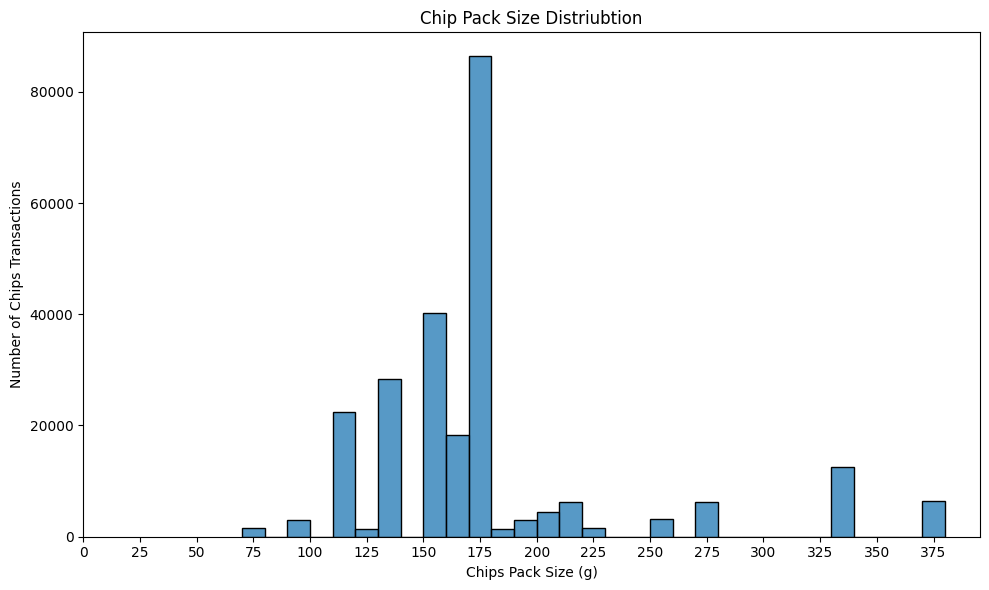

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(df,
             x='pack_size',
             binwidth=10)

plt.xticks(ticks=range(0,400,25))
plt.xlabel('Chips Pack Size (g)')
plt.ylabel('Number of Chips Transactions')
plt.title('Chip Pack Size Distriubtion')
plt.tight_layout()
plt.savefig('chips-size-distro.png')
plt.show()

Majority of the chips purchased are of the sizes 175 g, followed by 150 g

In [ ]:
# Aggregating purchase values by lifestage, and customer type (premium_customer)
sale_bvx = df.groupby(['lifestage','premium_customer'])['tot_sales'].aggregate(['sum','mean']).reset_index()

In [ ]:
sale_bvx

,lifestage,premium_customer,sum,mean
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,7.108442
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,7.637156
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,7.152371
3,NEW FAMILIES,Budget,20607.45,7.297256
4,NEW FAMILIES,Mainstream,15979.70,7.313364
5,NEW FAMILIES,Premium,10760.80,7.231720
6,OLDER FAMILIES,Budget,156863.75,7.291241
7,OLDER FAMILIES,Mainstream,96413.55,7.281440
8,OLDER FAMILIES,Premium,75242.60,7.232779
9,OLDER SINGLES/COUPLES,Budget,127833.60,7.444305


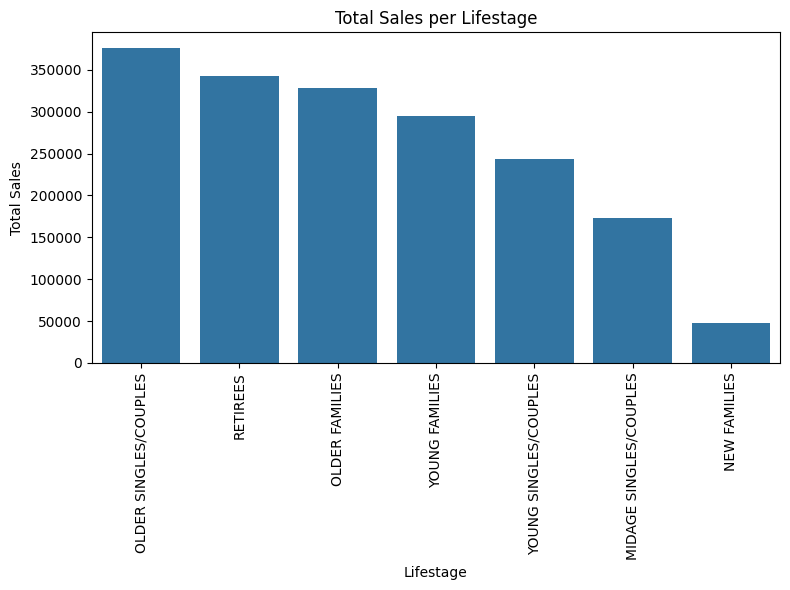

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(sale_bvx.groupby('lifestage')['sum'].sum().reset_index(),
            x='lifestage',
            y='sum',
            order=sale_bvx.groupby('lifestage')['sum'].sum().reset_index().sort_values('sum',ascending=False).lifestage)

plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.title('Total Sales per Lifestage')
plt.tight_layout()
plt.savefig('sales-per-lifestage.png')
plt.show()

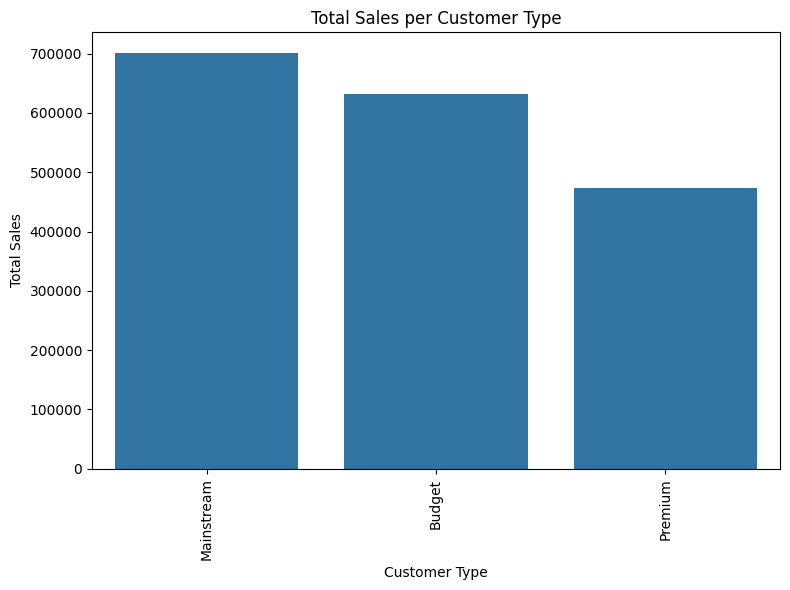

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(sale_bvx.groupby('premium_customer')['sum'].sum().reset_index(),
            x='premium_customer',
            y='sum',
            order=sale_bvx.groupby('premium_customer')['sum'].sum().reset_index().sort_values('sum',ascending=False).premium_customer)

plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.title('Total Sales per Customer Type')
plt.tight_layout()
plt.savefig('sales-per-customer_type.png')
plt.show()

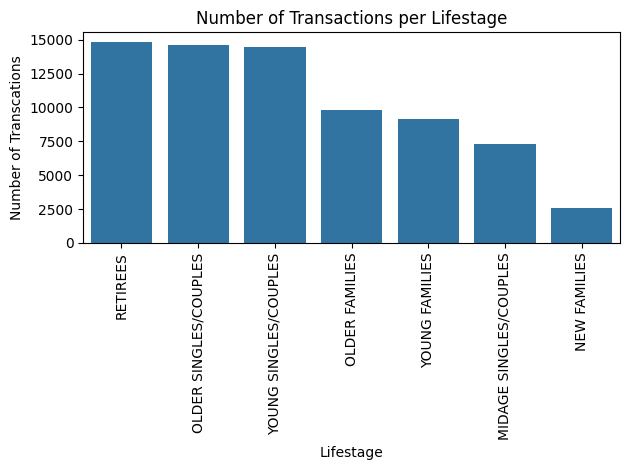

In [ ]:
plt.figure()

sns.barplot(customer_info['lifestage'].value_counts().reset_index(),
            x='lifestage',
            y='count')

plt.xticks(rotation=90)
plt.xlabel('Lifestage')
plt.ylabel('Number of Transcations')
plt.title('Number of Transactions per Lifestage')
plt.tight_layout()
plt.savefig('txn-per-lifestage.png')
plt.show()

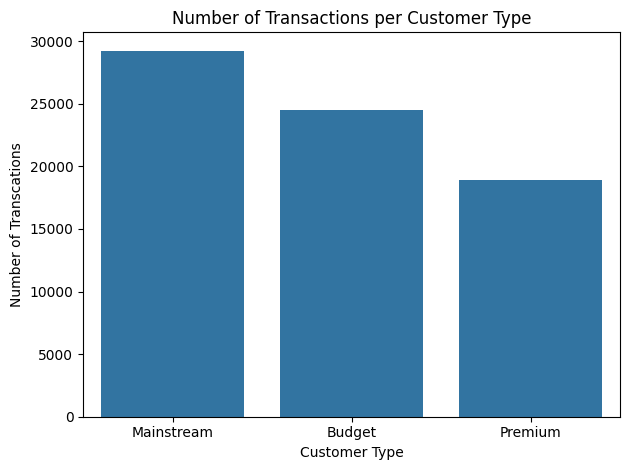

In [ ]:
plt.figure()

sns.barplot(customer_info['premium_customer'].value_counts().reset_index(),
            x='premium_customer',
            y='count')
plt.xlabel('Customer Type')
plt.ylabel('Number of Transcations')
plt.title('Number of Transactions per Customer Type')
plt.tight_layout()
plt.savefig('txn-per-customer_type.png')
plt.show()

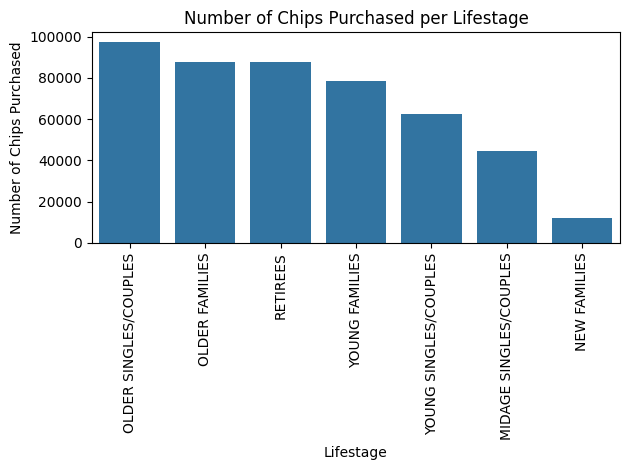

In [ ]:
plt.figure()

sns.barplot(df.groupby('lifestage')['prod_qty'].sum().reset_index().sort_values('prod_qty',ascending=False),
            x='lifestage',
            y='prod_qty')

plt.xticks(rotation=90)
plt.xlabel('Lifestage')
plt.ylabel('Number of Chips Purchased')
plt.title('Number of Chips Purchased per Lifestage')
plt.tight_layout()
plt.savefig('chip-volume-per-lifestage.png')
plt.show()

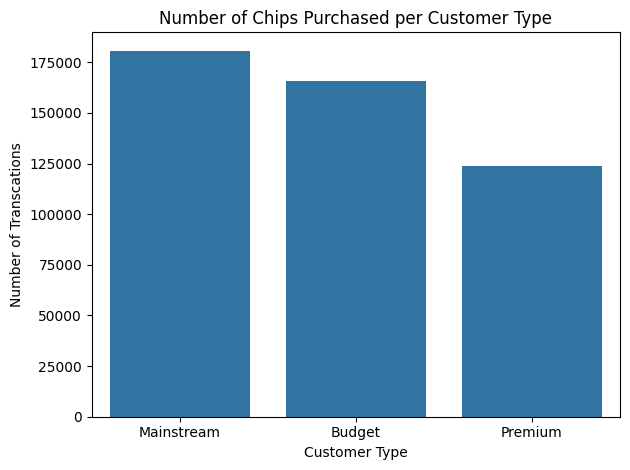

In [ ]:
plt.figure()

sns.barplot(df.groupby('premium_customer')['prod_qty'].sum().reset_index().sort_values('prod_qty',ascending=False),
            x='premium_customer',
            y='prod_qty')
plt.xlabel('Customer Type')
plt.ylabel('Number of Transcations')
plt.title('Number of Chips Purchased per Customer Type')
plt.tight_layout()
plt.savefig('chip-volume-per-customer_type.png')
plt.show()

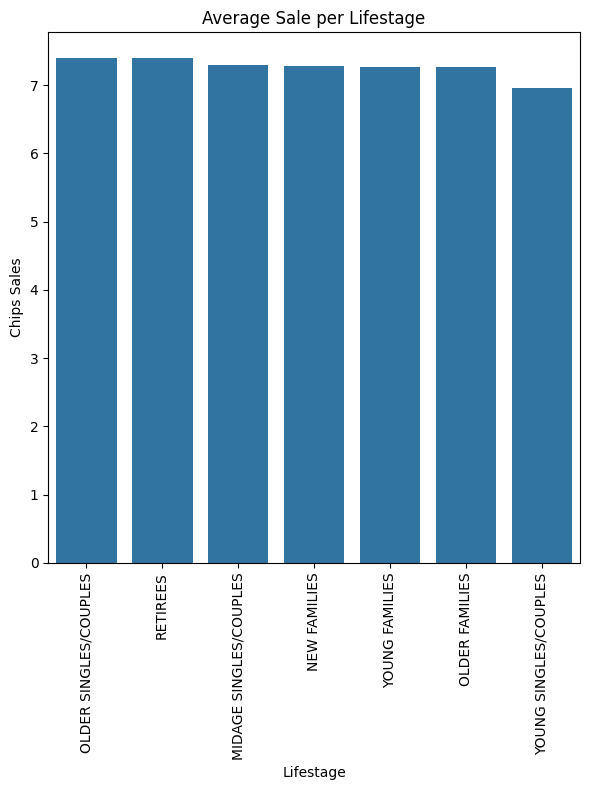

In [ ]:
plt.figure(figsize=(6,8))

sns.barplot(sale_bvx.groupby('lifestage')['mean'].mean().reset_index(),
            x='lifestage',
            y='mean',
            order=sale_bvx.groupby('lifestage')['mean'].mean().reset_index().sort_values('mean',ascending=False).lifestage)

plt.xlabel('Lifestage')
plt.ylabel('Chips Sales')
plt.title('Average Sale per Lifestage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('avg-sales-per-lifestage.png')
plt.show()

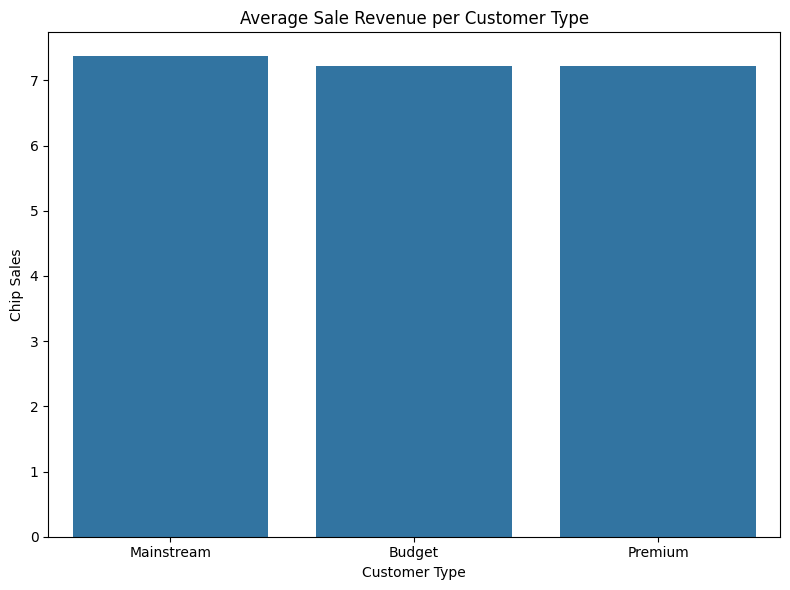

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(sale_bvx.groupby('premium_customer')['mean'].mean().reset_index(),
            x='premium_customer',
            y='mean',
            order=sale_bvx.groupby('premium_customer')['mean'].mean().reset_index().sort_values('mean',ascending=False).premium_customer)

plt.xlabel('Customer Type')
plt.ylabel('Chip Sales')
plt.title('Average Sale Revenue per Customer Type')

plt.tight_layout()
plt.savefig('avg-sales-per-customer_type.png')
plt.show()

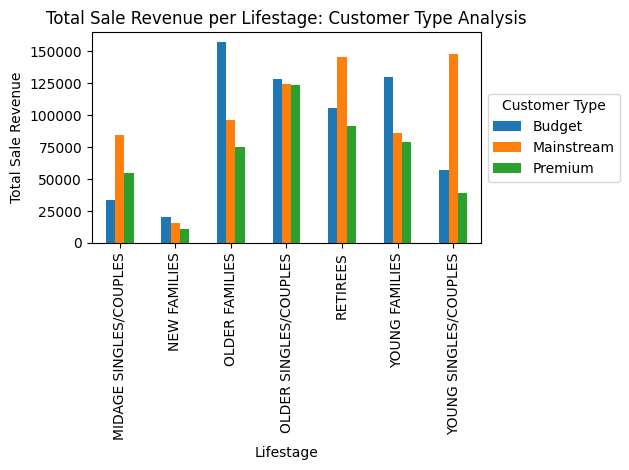

In [ ]:
sale_bvx.pivot_table(values='sum',columns='premium_customer',index='lifestage').plot(kind='bar')
plt.xlabel('Lifestage')
plt.ylabel('Total Sale Revenue')
plt.title('Total Sale Revenue per Lifestage: Customer Type Analysis')
plt.legend(title = 'Customer Type', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.savefig('tot-sale-per-ls_cta')
plt.show()

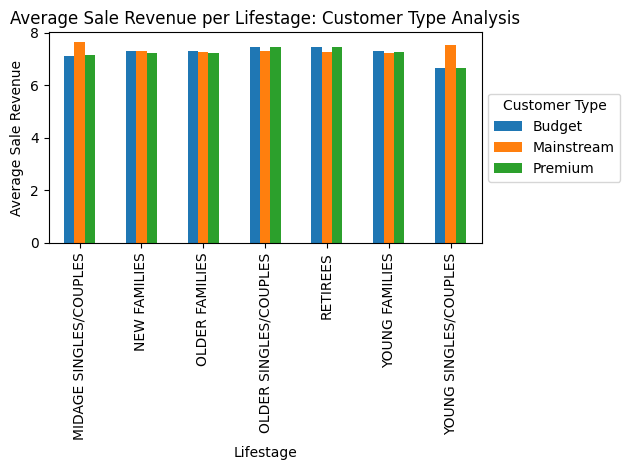

In [ ]:
sale_bvx.pivot_table(values='mean',columns='premium_customer',index='lifestage').plot(kind='bar')
plt.xlabel('Lifestage')
plt.ylabel('Average Sale Revenue')
plt.title('Average Sale Revenue per Lifestage: Customer Type Analysis')
plt.legend(title = 'Customer Type', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.savefig('avg-sale-per-ls_cta')
plt.show()

In [ ]:
df.pivot_table(values='prod_qty',columns='premium_customer',index='lifestage')

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,1.893626,1.911942,1.891750
NEW FAMILIES,1.855878,1.858124,1.860887
OLDER FAMILIES,1.945384,1.948795,1.945496
OLDER SINGLES/COUPLES,1.914920,1.911201,1.913944
RETIREES,1.893286,1.886680,1.901438
YOUNG FAMILIES,1.941226,1.941408,1.938149
YOUNG SINGLES/COUPLES,1.808002,1.853510,1.807075


In [ ]:
prod_quant = df.groupby(['lifestage','premium_customer'])['prod_qty'].mean().reset_index().pivot_table(values='prod_qty',index='lifestage',columns='premium_customer')

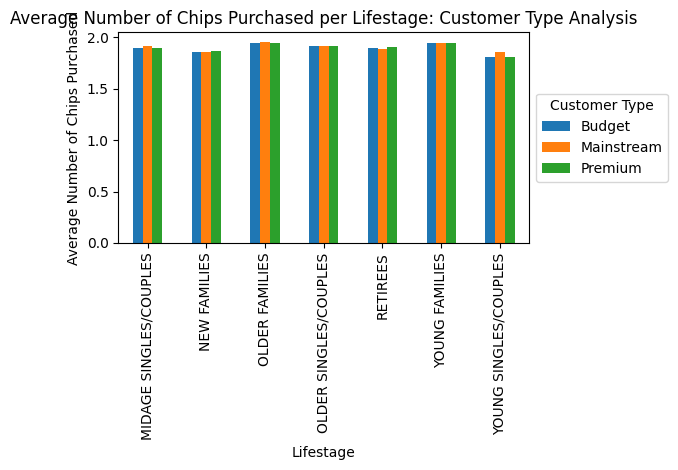

In [ ]:
prod_quant.plot(kind='bar')
plt.xlabel('Lifestage')
plt.ylabel('Average Number of Chips Purchased')
plt.title('Average Number of Chips Purchased per Lifestage: Customer Type Analysis')
plt.legend(title = 'Customer Type', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.savefig('no-chips-per-ls_cta')
plt.show()

In [ ]:
customer_info

,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
cat_count = (
    customer_info.groupby(['lifestage','premium_customer'])['lylty_card_nbr']
    .size()
    .reset_index(name='count')
    .pivot_table(index='lifestage',columns='premium_customer',values='count'))

In [ ]:
cat_count

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,1504.0,3340.0,2431.0
NEW FAMILIES,1112.0,849.0,588.0
OLDER FAMILIES,4675.0,2831.0,2274.0
OLDER SINGLES/COUPLES,4929.0,4930.0,4750.0
RETIREES,4454.0,6479.0,3872.0
YOUNG FAMILIES,4017.0,2728.0,2433.0
YOUNG SINGLES/COUPLES,3779.0,8088.0,2574.0


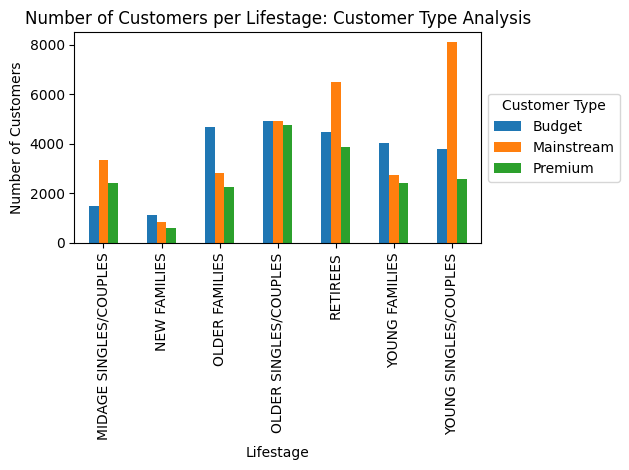

In [ ]:
cat_count.plot(kind='bar')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Lifestage: Customer Type Analysis')
plt.legend(title = 'Customer Type', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.savefig('n-customer-per-ls_cta')
plt.show()

## t-test Analysis

In [ ]:
main_mid_yg = df.loc[(df['premium_customer'] == 'Mainstream') & (df['lifestage'].isin(['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']))]['unit_price']

In [ ]:
nonmain_mid_yg = df.loc[~(df['premium_customer'] == 'Mainstream') & (df['lifestage'].isin(['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']))]['unit_price']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_stat, p_val = ttest_ind(main_mid_yg, nonmain_mid_yg, alternative='greater')

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Making a copy fo the original dataframe for association analysis
assoc_df = df.copy()

In [ ]:
assoc_df['group'] = assoc_df['lifestage'] + ' - ' + assoc_df['premium_customer']

In [ ]:
group = pd.get_dummies(assoc_df['group'])

brand = pd.get_dummies(assoc_df['brand_name'])

group_brands = group.join(brand)

In [ ]:
freq_groupsbands = apriori(group_brands, min_support=0.008, use_colnames=True)

In [ ]:
rules = association_rules(freq_groupsbands, metric='lift', min_threshold=0.5)
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167335,0.015579,0.196684,1.175395,0.002325,1.036536,0.162059
1,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044967,0.167335,0.008657,0.192519,1.150503,0.001132,1.031189,0.136975
22,(RETIREES - Budget),(Kettle),0.057652,0.167335,0.010505,0.182214,1.088922,0.000858,1.018195,0.086656
32,(RETIREES - Premium),(Kettle),0.049591,0.167335,0.008981,0.181105,1.082291,0.000683,1.016816,0.080002
13,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167335,0.012422,0.178488,1.066654,0.000776,1.013577,0.067163


In [ ]:
set_temp_association = assoc_df['group'].unique()

In [ ]:
rules[rules['antecedents'].apply(lambda x: list(x)).apply(lambda x: x in set_temp_association)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167335,0.015579,0.196684,1.175395,0.002325,1.036536,0.162059
1,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044967,0.167335,0.008657,0.192519,1.150503,0.001132,1.031189,0.136975
22,(RETIREES - Budget),(Kettle),0.057652,0.167335,0.010505,0.182214,1.088922,0.000858,1.018195,0.086656
32,(RETIREES - Premium),(Kettle),0.049591,0.167335,0.008981,0.181105,1.082291,0.000683,1.016816,0.080002
13,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167335,0.012422,0.178488,1.066654,0.000776,1.013577,0.067163
21,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067111,0.167335,0.011944,0.177970,1.063555,0.000714,1.012937,0.064056
27,(RETIREES - Mainstream),(Kettle),0.080936,0.167335,0.013723,0.169554,1.013265,0.000180,1.002673,0.014244
17,(OLDER SINGLES/COUPLES - Mainstream),(Kettle),0.069146,0.167335,0.011490,0.166168,0.993030,-0.000081,0.998601,-0.007483
35,(YOUNG FAMILIES - Budget),(Kettle),0.071991,0.167335,0.011117,0.154422,0.922834,-0.000930,0.984729,-0.082658
4,(OLDER FAMILIES - Budget),(Kettle),0.087193,0.167335,0.013456,0.154318,0.922212,-0.001135,0.984608,-0.084590


In [ ]:
mask = (df['lifestage'] == 'YOUNG SINGLES/COUPLES') & (df['premium_customer'] == 'Mainstream')
young_main = df.loc[mask]
target_segment = young_main['brand_name'].value_counts(ascending=True).rename_axis('BRANDS').reset_index(name='TARGET')
target_segment['TARGET'] = target_segment['TARGET']/young_main.shape[0]

In [ ]:
not_target_segment = df.loc[df['lifestage'] != "YOUNG SINGLES/COUPLES"]
not_target_segment = not_target_segment.loc[not_target_segment['premium_customer'] != "Mainstream"]
other = not_target_segment["brand_name"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='NON_TARGET')
other["NON_TARGET"] = other["NON_TARGET"] / not_target_segment.shape[0]

In [ ]:
brand_proportions = target_segment.set_index('BRANDS').join(other.set_index('BRANDS'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['AFFINITY'] = brand_proportions['TARGET']/brand_proportions['NON_TARGET']
brand_proportions.sort_values('AFFINITY', ascending = False).head()

,BRANDS,TARGET,NON_TARGET,AFFINITY
8,Tyrrells,0.031672,0.025665,1.234080
13,Twisties,0.046050,0.037692,1.221747
18,Doritos,0.121725,0.100815,1.207411
12,Tostitos,0.045538,0.038289,1.189323
19,Kettle,0.196684,0.166211,1.183339


In [ ]:
group_gp = pd.get_dummies(assoc_df['group'])
brand_gp = pd.get_dummies(assoc_df['pack_size'])
group_brands_gp = group_gp.join(brand_gp)

In [ ]:
freq_groupsbrands_gp = apriori(group_brands_gp, min_support=0.009, use_colnames=True)
rules_gp = association_rules(freq_groupsbrands_gp, metric="lift", min_threshold=0.5)
rules_gp.sort_values('confidence', ascending = False, inplace = True)
set_temp = assoc_df["group"].unique()
rules_gp[rules_gp["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
38,(YOUNG FAMILIES - Premium),(175),0.043706,0.269066,0.012150,0.278004,1.033221,0.000391,1.012381,0.033623
34,(YOUNG FAMILIES - Budget),(175),0.071991,0.269066,0.019944,0.277037,1.029624,0.000574,1.011025,0.031004
40,(YOUNG SINGLES/COUPLES - Budget),(175),0.034745,0.269066,0.009476,0.272717,1.013569,0.000127,1.005020,0.013869
6,(OLDER FAMILIES - Mainstream),(175),0.053664,0.269066,0.014542,0.270977,1.007102,0.000103,1.002621,0.007451
8,(OLDER FAMILIES - Premium),(175),0.042162,0.269066,0.011413,0.270691,1.006041,0.000069,1.002229,0.006269
